## Explore DF

0,"2015-01-02 - Floating Points & Four Tet @ Plastic People Closing Party, London","https://www.mixesdb.com/w/2015-01-02_-_Floating_Points_%26_Four_Tet_@_Plastic_People_Closing_Party,_London",2015-01-02,2015-01-02,5:54:48,Hip Hop,1,The Tunnel,Azimuth,0:00:00,0:00:00


In [222]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

df = pd.read_csv('../MixDB_scrapper/output/data/scrapped_combo.csv')
df.head()

mix_id                                          mix_title  \
0       0  2015-01-02 - Floating Points & Four Tet @ Plas...   
1       0  2015-01-02 - Floating Points & Four Tet @ Plas...   
2       0  2015-01-02 - Floating Points & Four Tet @ Plas...   
3       0  2015-01-02 - Floating Points & Four Tet @ Plas...   
4       0  2015-01-02 - Floating Points & Four Tet @ Plas...   

                                             mix_url     dj_name    mix_date  \
0  https://www.mixesdb.com/w/2015-01-02_-_Floatin...  2015-01-02  2015-01-02   
1  https://www.mixesdb.com/w/2015-01-02_-_Floatin...  2015-01-02  2015-01-02   
2  https://www.mixesdb.com/w/2015-01-02_-_Floatin...  2015-01-02  2015-01-02   
3  https://www.mixesdb.com/w/2015-01-02_-_Floatin...  2015-01-02  2015-01-02   
4  https://www.mixesdb.com/w/2015-01-02_-_Floatin...  2015-01-02  2015-01-02   

  mix_duration mix_genre  track_number         track_title      track_artist  \
0      5:54:48   Hip Hop             1          The Tunnel           Azimuth   
1      5:54:48   Hip Hop             2  A Night In Tunisia  Conjunto Carcará   
2      5:54:48   Hip Hop             3  Mangueira é Cancáo       As Sublimes   
3      5:54:48   Hip Hop             4    Maracatu Atomico     Jorge Mautner   
4      5:54:48   Hip Hop             5      Com Mais De 30           Claudia   

  track_start_time track_time_position  
0          0:00:00             0:00:00  
1          0:09:11             0:09:11  
2          0:11:26             0:11:26  
3          0:14:10             0:14:10  
4          0:17:41             0:17:41

## Explore Dataset

## Dataset cleaning
1. Sepparating the first column (DATE - NAME - LOCATION/HOST)

In [223]:
# Split the mix_id column into date, session_name and location
df_edit = df.copy()
df_edit[['mix_date', 'mix_author', 'mix_location']] = df_edit['mix_title'].str.extract(r'^(\d{4}-\d{2}-\d{2})\s*-\s*(.*?)\s*(?:-|@)\s*(.*)$')

# Clean up any leading/trailing whitespace
df_edit['mix_date'] = df_edit['mix_date'].str.replace(" - ", "").str.replace("_", "").str.strip()
df_edit['mix_date'] = pd.to_datetime(df_edit['mix_date'], format='%Y-%m-%d', errors='coerce')
df_edit['mix_author'] = df_edit['mix_author'].str.replace("-", "").str.replace("_", "").str.strip()
df_edit['mix_location'] = df_edit['mix_location'].str.replace("-", "").str.replace("_", "").str.strip()
df_edit = df_edit[['mix_id', 'mix_date', 'mix_author', 'mix_location', 'mix_url', 'mix_duration', 'mix_genre', 'track_number', 'track_title', 'track_artist', 'track_start_time']]


# Display the first few rows to verify the split worked
df_edit.head()


mix_id   mix_date                  mix_author  \
0       0 2015-01-02  Floating Points & Four Tet   
1       0 2015-01-02  Floating Points & Four Tet   
2       0 2015-01-02  Floating Points & Four Tet   
3       0 2015-01-02  Floating Points & Four Tet   
4       0 2015-01-02  Floating Points & Four Tet   

                           mix_location  \
0  Plastic People Closing Party, London   
1  Plastic People Closing Party, London   
2  Plastic People Closing Party, London   
3  Plastic People Closing Party, London   
4  Plastic People Closing Party, London   

                                             mix_url mix_duration mix_genre  \
0  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
1  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
2  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
3  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
4  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   

   track_number         track_title      track_artist track_start_time  
0             1          The Tunnel           Azimuth          0:00:00  
1             2  A Night In Tunisia  Conjunto Carcará          0:09:11  
2             3  Mangueira é Cancáo       As Sublimes          0:11:26  
3             4    Maracatu Atomico     Jorge Mautner          0:14:10  
4             5      Com Mais De 30           Claudia          0:17:41

In [224]:
unique_generes = list(df_edit["mix_genre"].unique())
print("\t- " + '\n\t- '.join(unique_generes))

	- Hip Hop
	- Deep House
	- Techno
	- Progressive / Trance
	- Progressive House
	- Minimal House
	- Tech House
	- Pure Minimal
	- Drum & Bass
	- House


In [225]:
unique_djs = list(df_edit["mix_author"].dropna().unique())
print("\t- " + '\n\t- '.join(unique_djs))


	- Floating Points & Four Tet
	- Portishead
	- DJ Jazzy Jeff
	- Massive Attack
	- Autechre
	- DJ Shadow
	- Howie B
	- CJ Mackintosh
	- Jeff Mills aka The Wizard
	- VA
	- Flying Lotus
	- TNGHT
	- Teki Latex
	- Bradley Zero
	- DJ Yoda
	- John Kelly
	- Oneman
	- Freddy Fresh
	- Mr. Scruff
	- Baauer
	- DJ Craze
	- Lady D., Torsten Fenslau
	- UNKLE
	- Jamie xx
	- Luke Vibert
	- Mark Farina
	- Radiohead
	- Squarepusher
	- The Psychonauts
	- Raphaël Top
	- Ivy Lab
	- Henry Wu
	- DJ Krush
	- Downtown DJ Corporation Giessen
	- Gilles Peterson
	- Rob Da Bank & The Cuban Brothers
	- Grandmaster Flash & The Furious 4 MC's
	- Facta & K
	- Lefto
	- Real J
	- Ian Brown
	- Nguzunguzu
	- Paul Oakenfold, Nick Warren, James Lavelle
	- The Latin Rascals
	- Hexstatic
	- TWRK, J Espinosa
	- Lunice
	- Grandmaster Flash & The Furious Five
	- Marcellus Pittman
	- DJ AM & DJ Jazzy Jeff
	- The Wizard
	- Gilles Peterson, Q
	- DJ Red Alert
	- Hudson Mohawke, Salvatore Ganacci
	- Scratch Perverts
	- Dancin' Danny D

In [226]:
df_edit["mix_location"].unique()

array(['Plastic People Closing Party, London', 'Essential Mix',
       'Budweiser x Boiler Room What’s Brewing In Philadelphia', ...,
       'Get Physical Radio 237', 'Sun:Sets Vol.91',
       'Release Yourself 760'], shape=(35892,), dtype=object)

In [227]:
df_edit.to_csv("../MixDB_scrapper/output/data/scrapped_combo_forKaggle.csv", index=False)

## Clean for training

In [228]:
df_edit = pd.read_csv("../MixDB_scrapper/output/data/scrapped_combo_forKaggle.csv")
df_edit.head()

mix_id    mix_date                  mix_author  \
0       0  2015-01-02  Floating Points & Four Tet   
1       0  2015-01-02  Floating Points & Four Tet   
2       0  2015-01-02  Floating Points & Four Tet   
3       0  2015-01-02  Floating Points & Four Tet   
4       0  2015-01-02  Floating Points & Four Tet   

                           mix_location  \
0  Plastic People Closing Party, London   
1  Plastic People Closing Party, London   
2  Plastic People Closing Party, London   
3  Plastic People Closing Party, London   
4  Plastic People Closing Party, London   

                                             mix_url mix_duration mix_genre  \
0  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
1  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
2  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
3  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   
4  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48   Hip Hop   

   track_number         track_title      track_artist track_start_time  
0             1          The Tunnel           Azimuth          0:00:00  
1             2  A Night In Tunisia  Conjunto Carcará          0:09:11  
2             3  Mangueira é Cancáo       As Sublimes          0:11:26  
3             4    Maracatu Atomico     Jorge Mautner          0:14:10  
4             5      Com Mais De 30           Claudia          0:17:41

1. Remove rows where track author, artist or mix_genre is NaN

In [229]:
print(len(df_edit))
df_clean = df_edit[df_edit['track_artist'].notna() & df_edit['mix_genre'].notna() & df_edit['track_title'].notna()]
print(len(df_clean))

1115560
1115548


2. Find the amount of songs in the playlists and represent a histogram

Average tracks per mix: 16.2
Median tracks per mix: 18.0
Min tracks: 1
Max tracks: 58


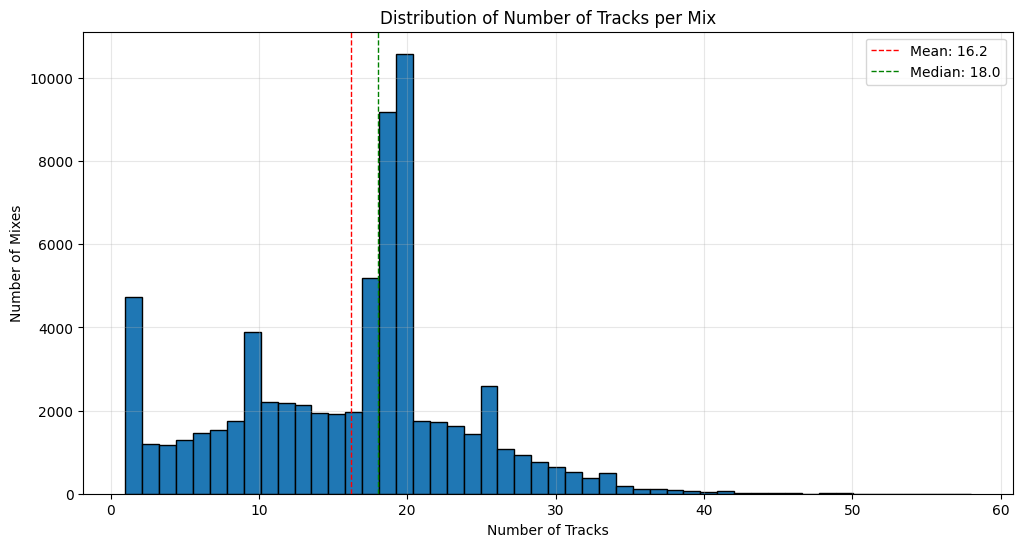

In [230]:
# Count number of tracks per mix_id
tracks_per_mix = df_clean.groupby('mix_id').size()

# Create histogram
plt.figure(figsize=(12,6))
plt.hist(tracks_per_mix, bins=50, edgecolor='black')
plt.title('Distribution of Number of Tracks per Mix')
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Mixes')
plt.grid(True, alpha=0.3)

# Add mean and median lines
plt.axvline(tracks_per_mix.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {tracks_per_mix.mean():.1f}')
plt.axvline(tracks_per_mix.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {tracks_per_mix.median():.1f}')
plt.legend()

print(f"Average tracks per mix: {tracks_per_mix.mean():.1f}")
print(f"Median tracks per mix: {tracks_per_mix.median():.1f}")
print(f"Min tracks: {tracks_per_mix.min()}")
print(f"Max tracks: {tracks_per_mix.max()}")


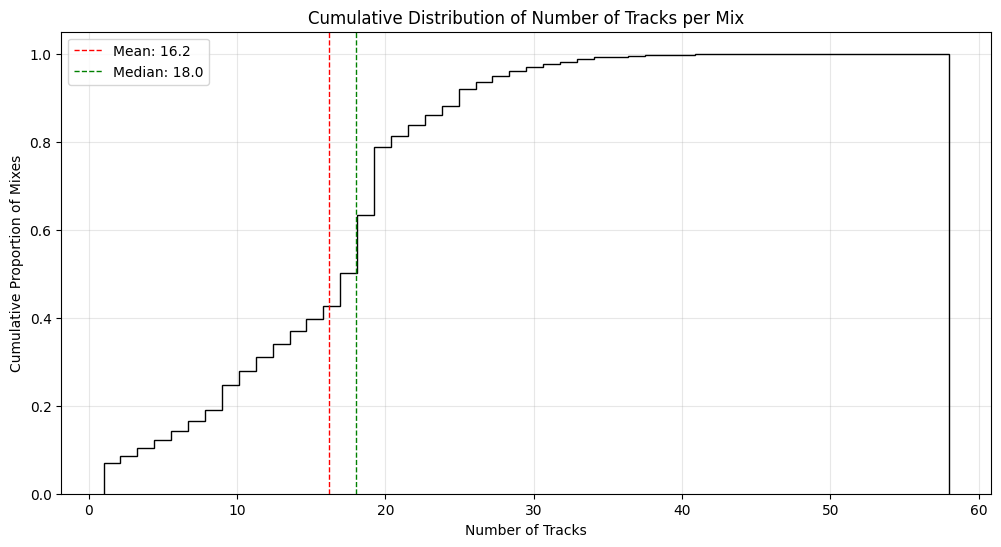

In [231]:
# Create cumulative histogram
plt.figure(figsize=(12,6))
plt.hist(tracks_per_mix, bins=50, density=True, cumulative=True, histtype='step', edgecolor='black')
plt.title('Cumulative Distribution of Number of Tracks per Mix')
plt.xlabel('Number of Tracks')
plt.ylabel('Cumulative Proportion of Mixes')
plt.grid(True, alpha=0.3)

# Add mean and median lines
plt.axvline(tracks_per_mix.mean(), color='red', linestyle='dashed', linewidth=1, label=f'Mean: {tracks_per_mix.mean():.1f}')
plt.axvline(tracks_per_mix.median(), color='green', linestyle='dashed', linewidth=1, label=f'Median: {tracks_per_mix.median():.1f}')
plt.legend()


For more detail, plot one histogram and cumulative histogram per genre

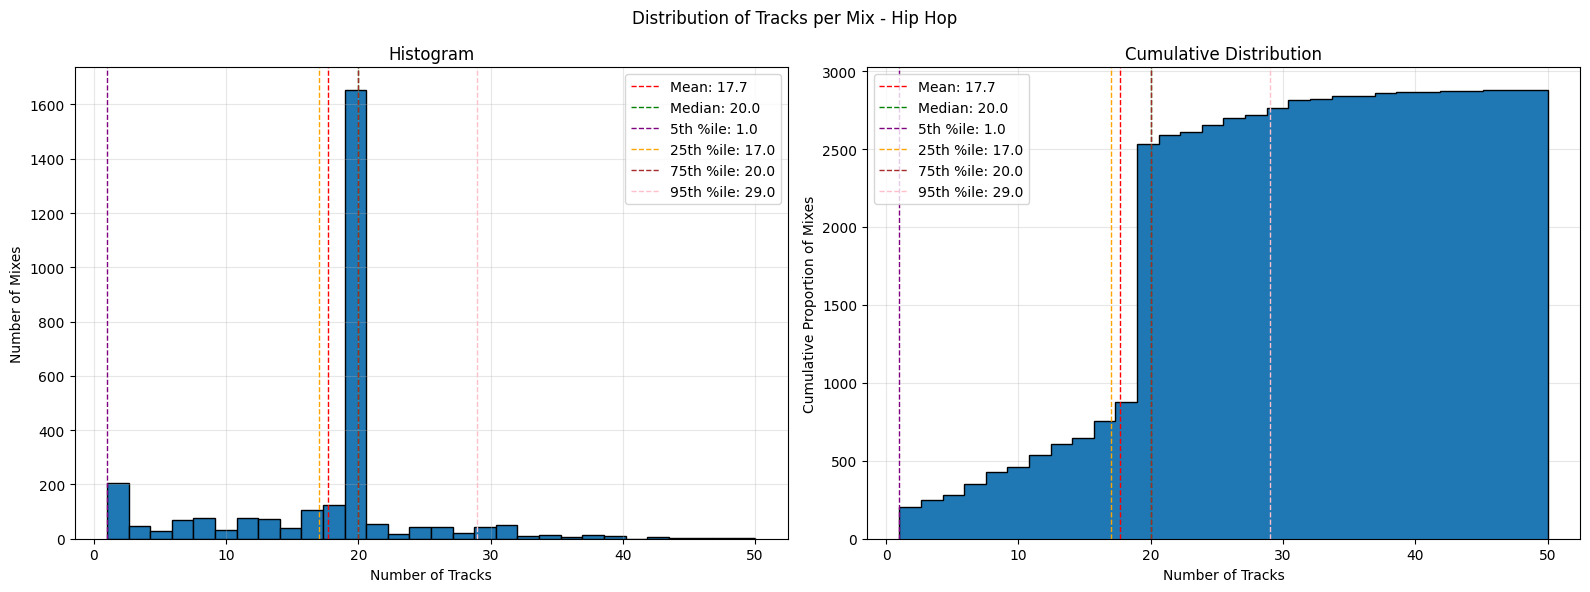

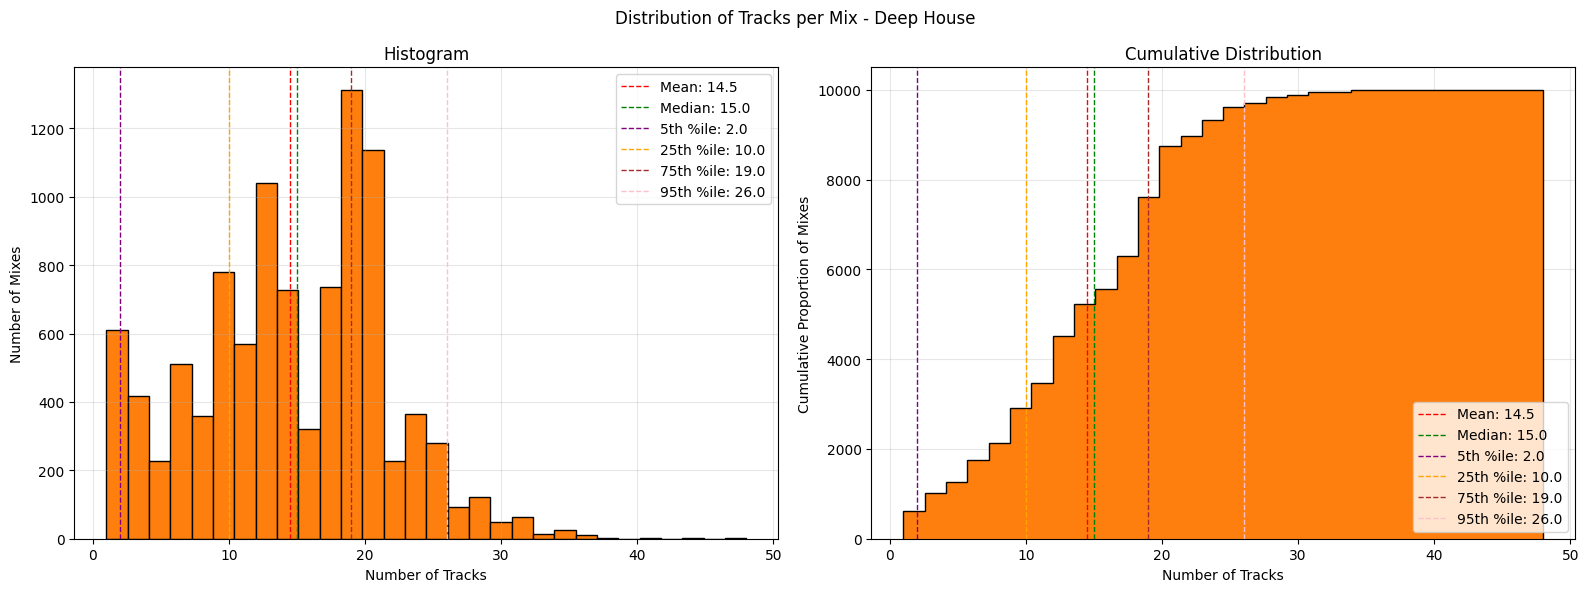

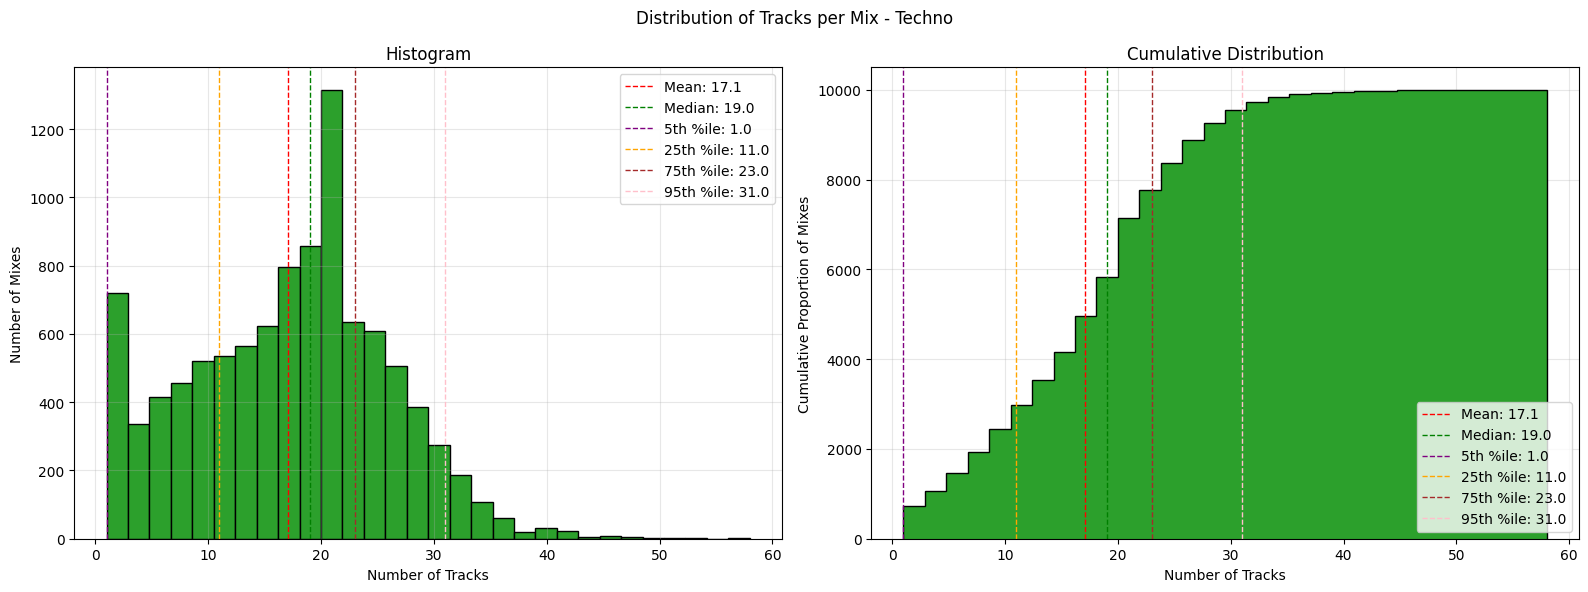

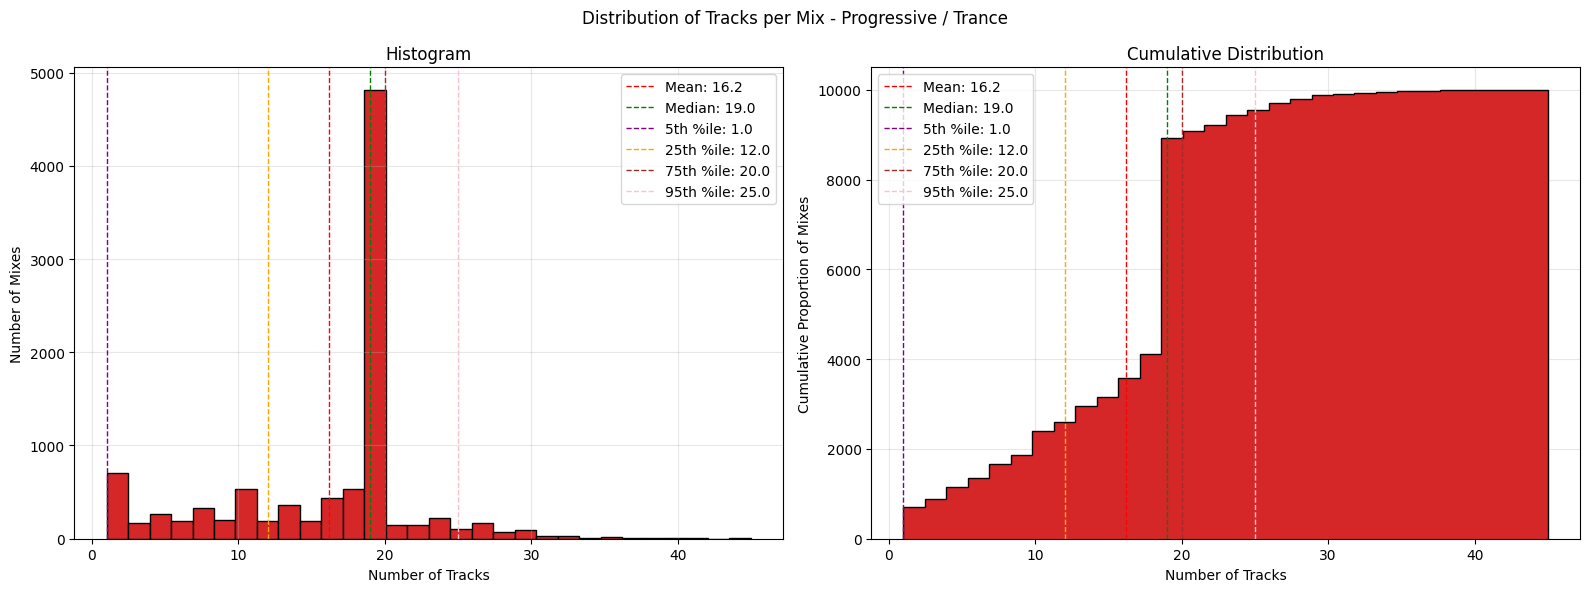

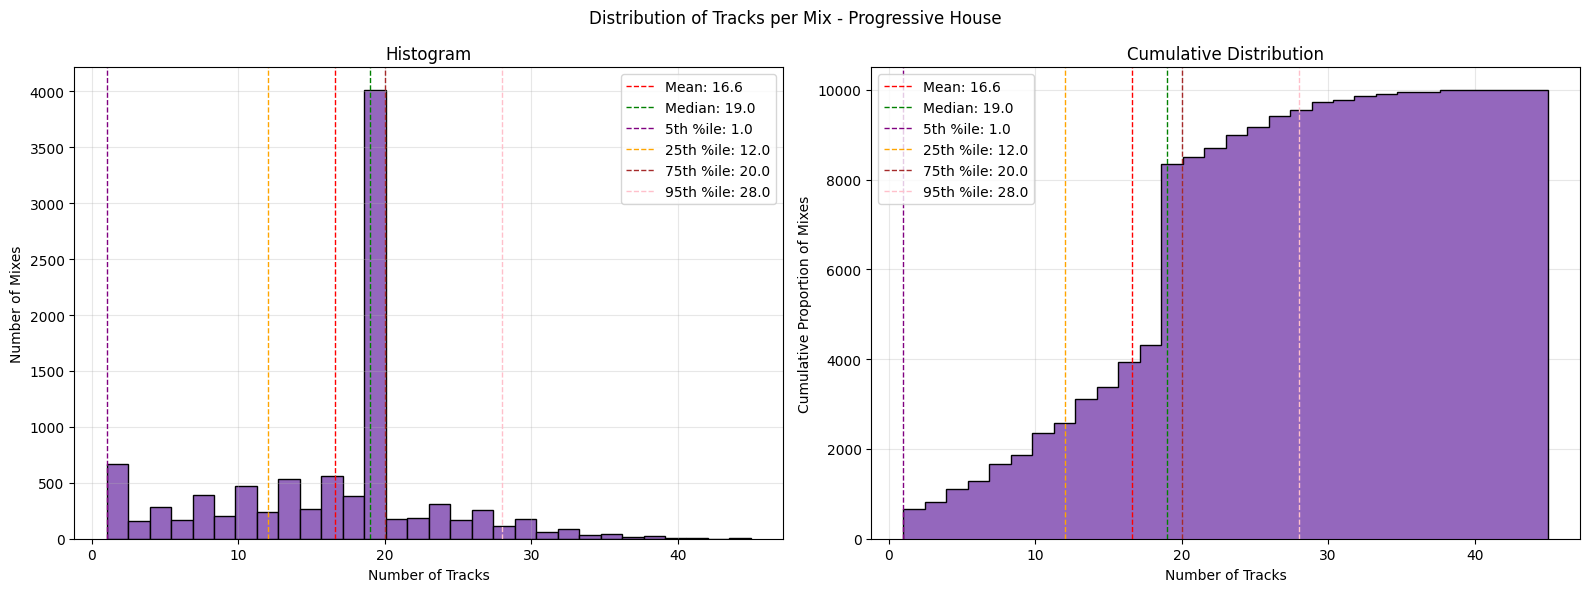

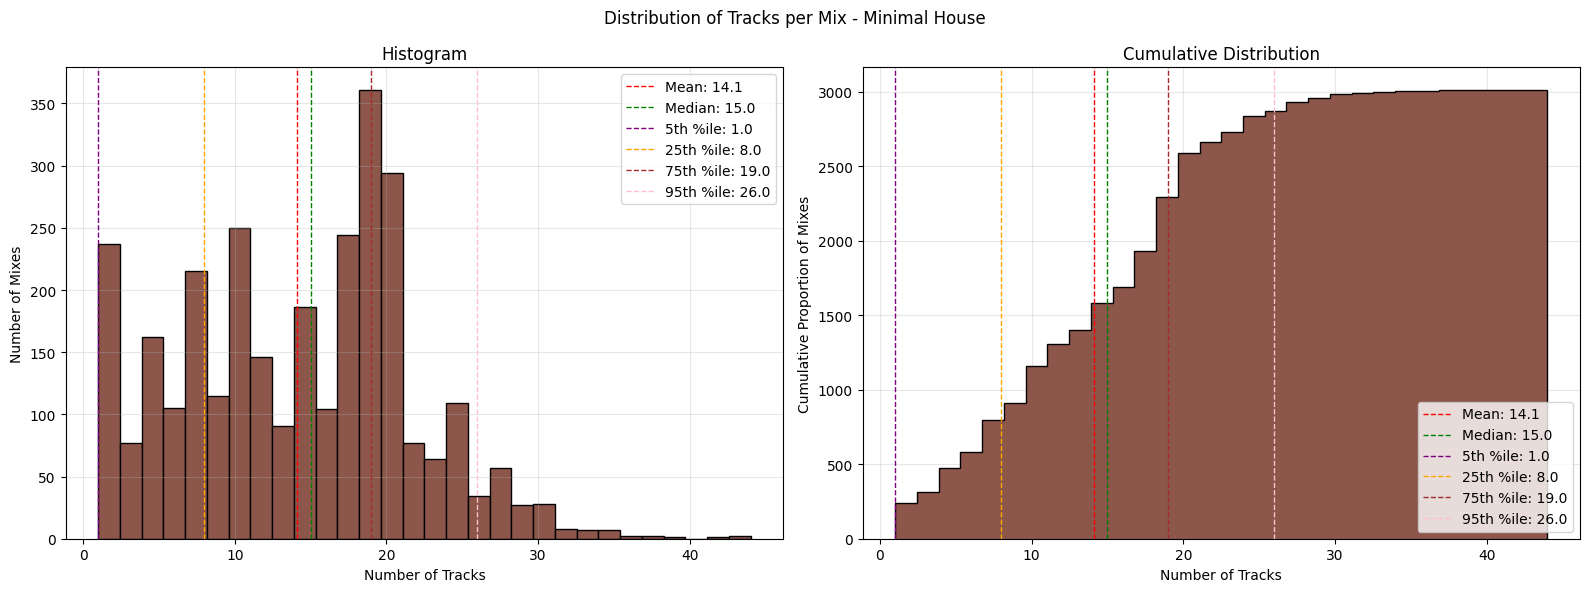

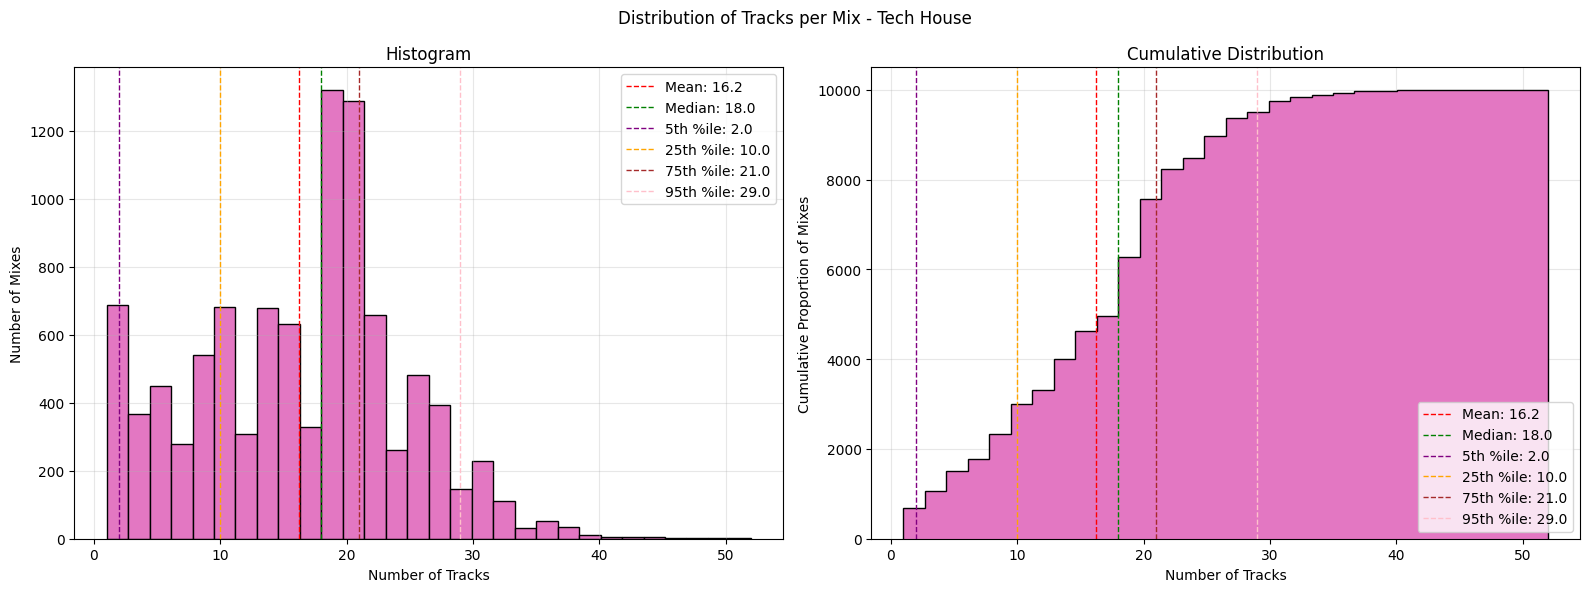

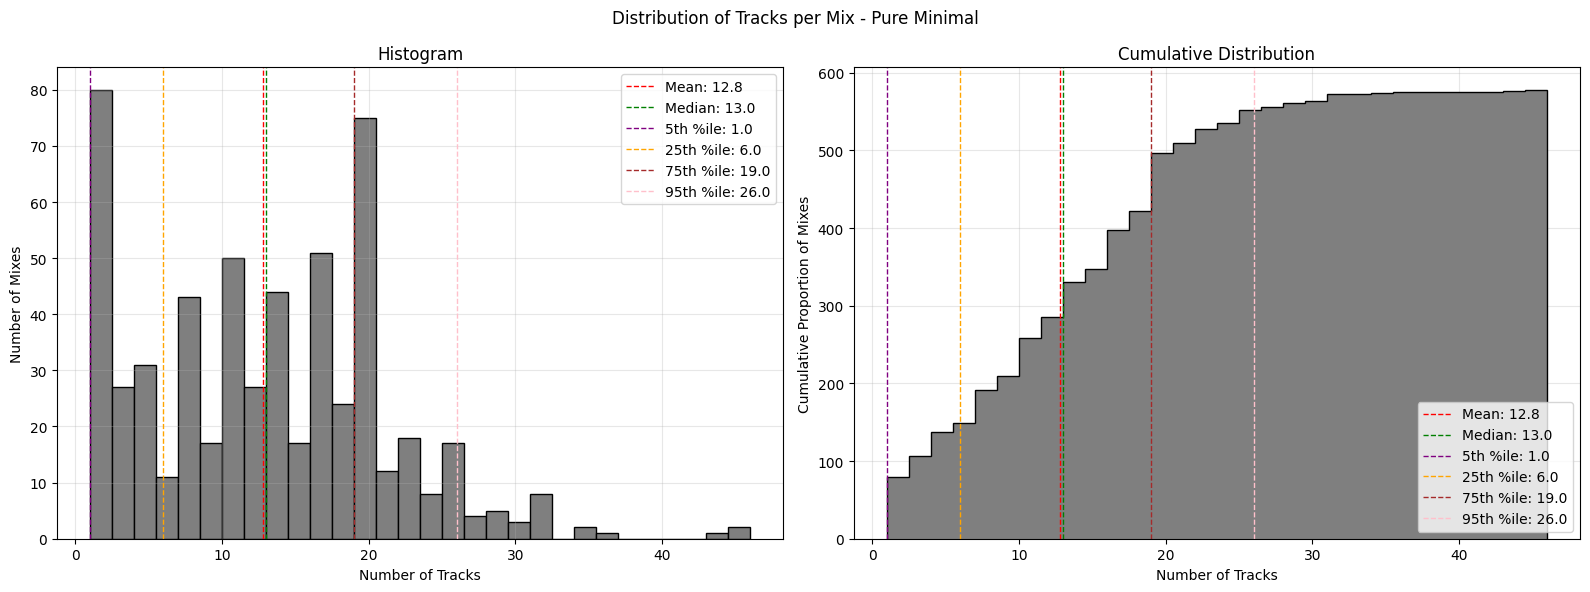

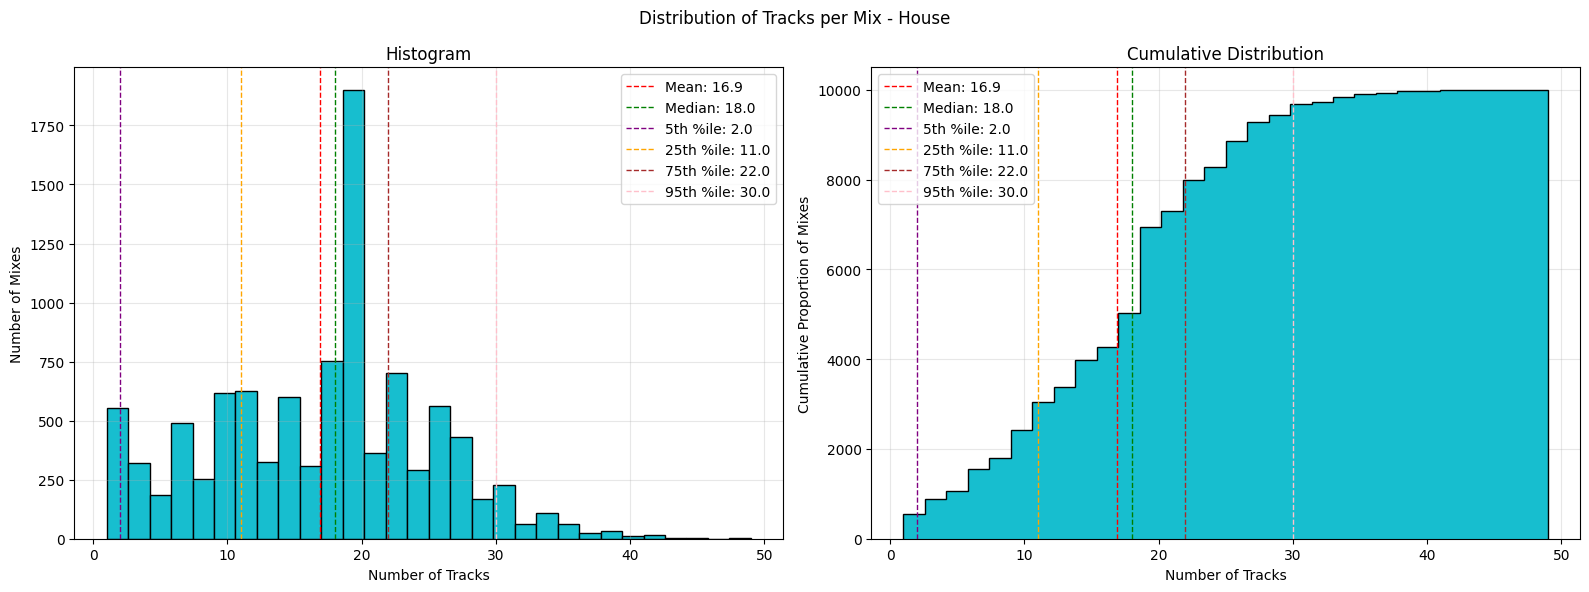

In [232]:
# Get unique genres
genres = df_clean['mix_genre'].unique()
colors = plt.cm.tab10.colors

# Create subplots for each genre
for i, genre in enumerate(genres):
    # Filter data for this genre
    genre_data = df_clean[df_clean['mix_genre'] == genre].groupby('mix_id').size()
    
    if len(genre_data) > 0:  # Only plot if we have data for this genre
        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'Distribution of Tracks per Mix - {genre}')
        
        # Calculate percentiles
        p5 = genre_data.quantile(0.05)
        p25 = genre_data.quantile(0.25)
        p75 = genre_data.quantile(0.75)
        p95 = genre_data.quantile(0.95)
        
        # Normal histogram
        ax1.hist(genre_data, bins=30, edgecolor='black', color=colors[i])
        ax1.set_title('Histogram')
        ax1.set_xlabel('Number of Tracks')
        ax1.set_ylabel('Number of Mixes')
        ax1.grid(True, alpha=0.3)
        
        # Add mean, median and percentile lines
        ax1.axvline(genre_data.mean(), color='red', linestyle='dashed', linewidth=1,
                   label=f'Mean: {genre_data.mean():.1f}')
        ax1.axvline(genre_data.median(), color='green', linestyle='dashed', linewidth=1,
                    label=f'Median: {genre_data.median():.1f}')
        ax1.axvline(p5, color='purple', linestyle='dashed', linewidth=1,
                    label=f'5th %ile: {p5:.1f}')
        ax1.axvline(p25, color='orange', linestyle='dashed', linewidth=1,
                    label=f'25th %ile: {p25:.1f}')
        ax1.axvline(p75, color='brown', linestyle='dashed', linewidth=1,
                    label=f'75th %ile: {p75:.1f}')
        ax1.axvline(p95, color='pink', linestyle='dashed', linewidth=1,
                    label=f'95th %ile: {p95:.1f}')
        ax1.legend()
        
        # Cumulative histogram
        ax2.hist(genre_data, bins=30, cumulative=True,
                histtype='step', edgecolor='black', fill=True, color=colors[i])
        ax2.set_title('Cumulative Distribution')
        ax2.set_xlabel('Number of Tracks')
        ax2.set_ylabel('Cumulative Proportion of Mixes')
        ax2.grid(True, alpha=0.3)
        
        # Add mean, median and percentile lines
        ax2.axvline(genre_data.mean(), color='red', linestyle='dashed', linewidth=1,
                    label=f'Mean: {genre_data.mean():.1f}')
        ax2.axvline(genre_data.median(), color='green', linestyle='dashed', linewidth=1,
                    label=f'Median: {genre_data.median():.1f}')
        ax2.axvline(p5, color='purple', linestyle='dashed', linewidth=1,
                    label=f'5th %ile: {p5:.1f}')
        ax2.axvline(p25, color='orange', linestyle='dashed', linewidth=1,
                    label=f'25th %ile: {p25:.1f}')
        ax2.axvline(p75, color='brown', linestyle='dashed', linewidth=1,
                    label=f'75th %ile: {p75:.1f}')
        ax2.axvline(p95, color='pink', linestyle='dashed', linewidth=1,
                    label=f'95th %ile: {p95:.1f}')
        ax2.legend()
        
        plt.tight_layout()


We can affoard to remove playlists with less than 8 songs for quality purposes

In [233]:
print(f"CLEANING REMOVING MIXES WITH LESS THAN 8 TRACKS \n FROM: {len(df_clean)} ({len(df_clean.groupby('mix_id'))} lists)")
df_clean_filt8 = df_clean.groupby('mix_id').filter(lambda x: len(x) >= 8)
print(f" TO: {len(df_clean_filt8)} ({len(df_clean_filt8.groupby('mix_id'))} lists)")

CLEANING REMOVING MIXES WITH LESS THAN 8 TRACKS 
 FROM: 1115548 (68955 lists)
 TO: 1075302 (57568 lists)


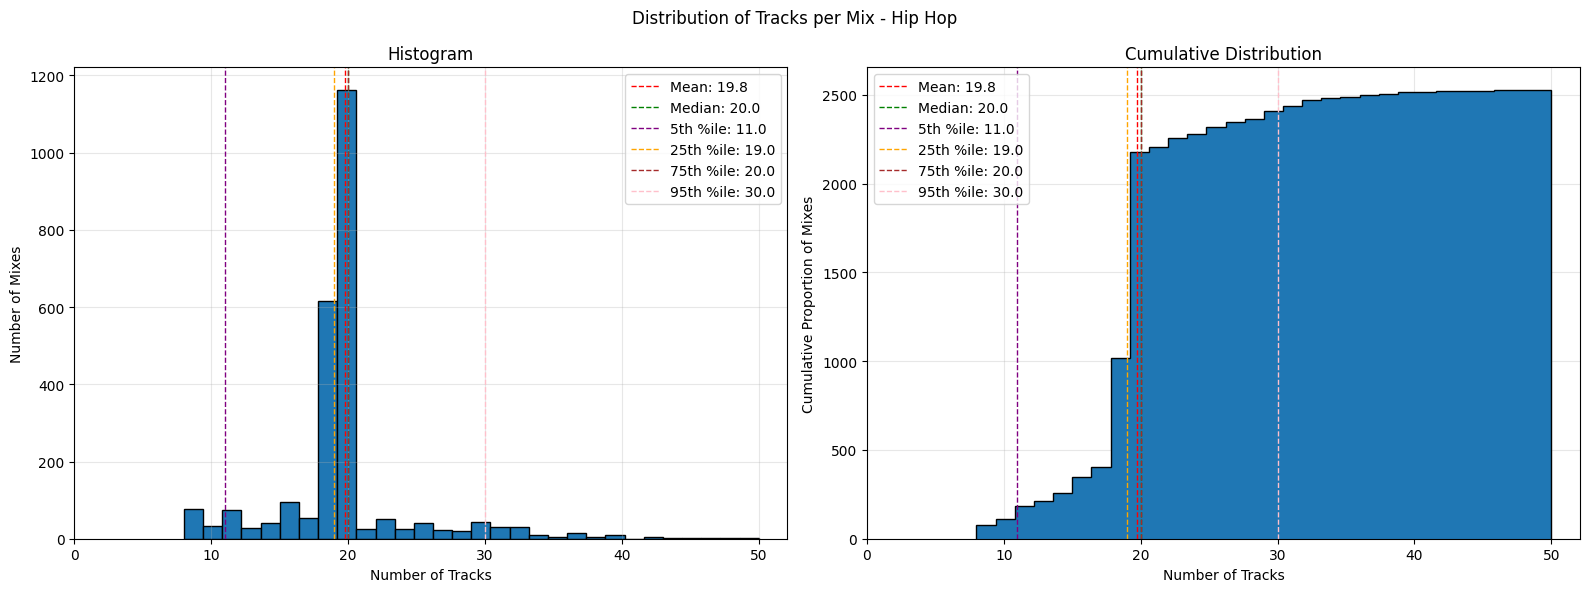

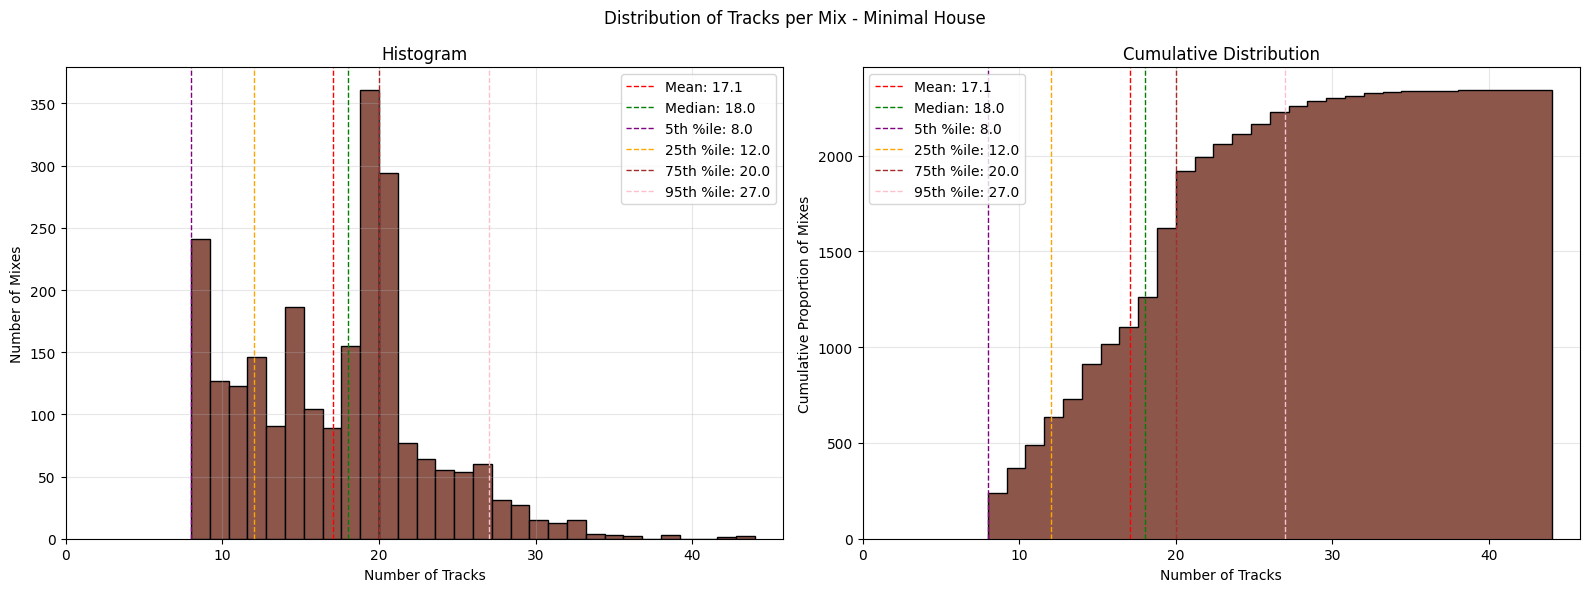

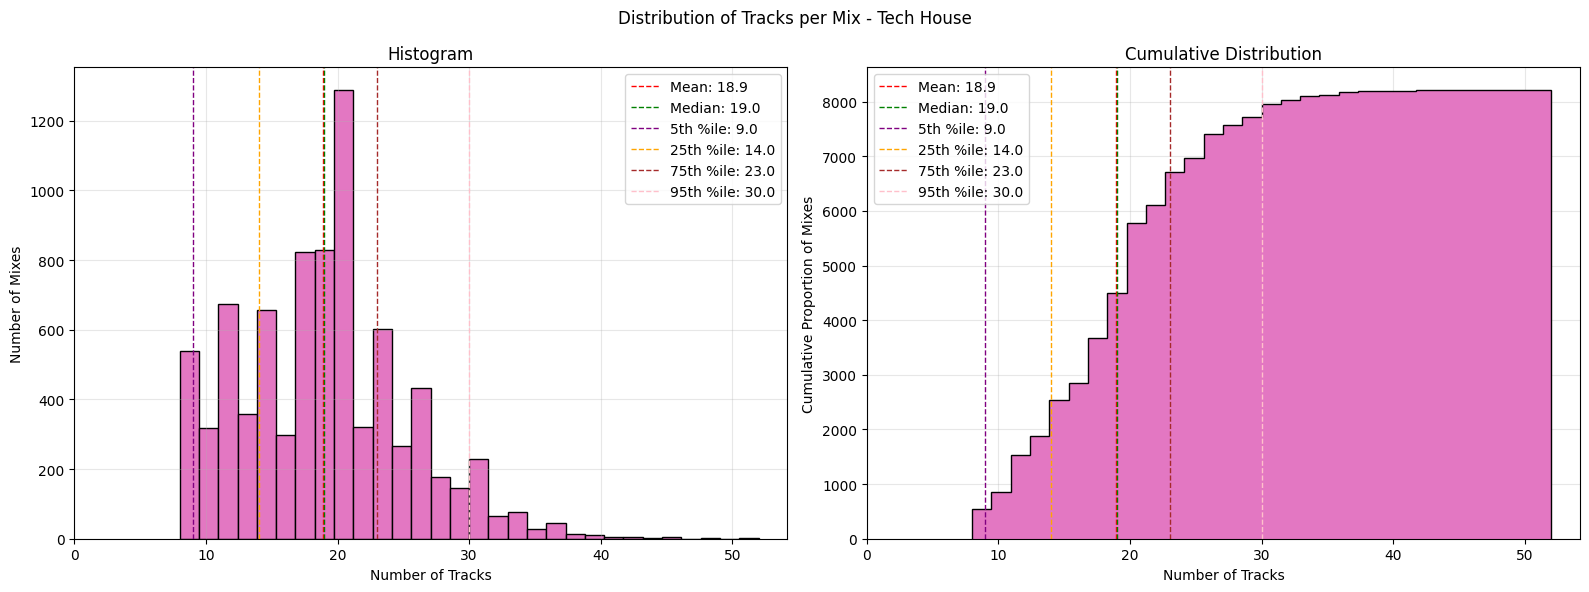

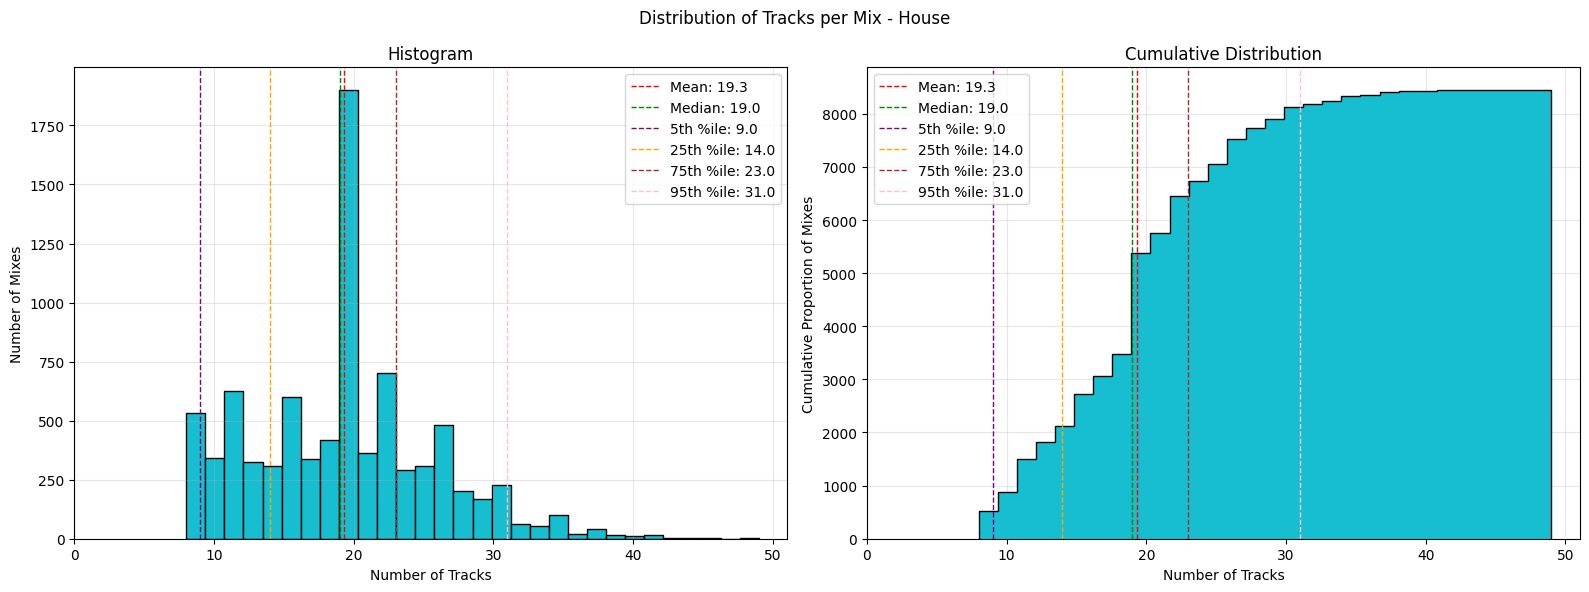

In [234]:
# Get unique genres
genres = df_clean_filt8['mix_genre'].unique()
colors = plt.cm.tab10.colors

# Create subplots for each genre
for i, genre in enumerate(genres):
    # Filter data for this genre
    genre_data = df_clean_filt8[df_clean_filt8['mix_genre'] == genre].groupby('mix_id').size()
    
    if len(genre_data) > 0:  # Only plot if we have data for this genre
        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'Distribution of Tracks per Mix - {genre}')
        
        # Calculate percentiles
        p5 = genre_data.quantile(0.05)
        p25 = genre_data.quantile(0.25)
        p75 = genre_data.quantile(0.75)
        p95 = genre_data.quantile(0.95)
        
        # Normal histogram
        ax1.hist(genre_data, bins=30, edgecolor='black', color=colors[i])
        ax1.set_title('Histogram')
        ax1.set_xlabel('Number of Tracks')
        ax1.set_xlim(left=0)
        ax1.set_ylabel('Number of Mixes')
        ax1.grid(True, alpha=0.3)
        
        # Add mean, median and percentile lines
        ax1.axvline(genre_data.mean(), color='red', linestyle='dashed', linewidth=1,
                   label=f'Mean: {genre_data.mean():.1f}')
        ax1.axvline(genre_data.median(), color='green', linestyle='dashed', linewidth=1,
                    label=f'Median: {genre_data.median():.1f}')
        ax1.axvline(p5, color='purple', linestyle='dashed', linewidth=1,
                    label=f'5th %ile: {p5:.1f}')
        ax1.axvline(p25, color='orange', linestyle='dashed', linewidth=1,
                    label=f'25th %ile: {p25:.1f}')
        ax1.axvline(p75, color='brown', linestyle='dashed', linewidth=1,
                    label=f'75th %ile: {p75:.1f}')
        ax1.axvline(p95, color='pink', linestyle='dashed', linewidth=1,
                    label=f'95th %ile: {p95:.1f}')
        ax1.legend()
        
        # Cumulative histogram
        ax2.hist(genre_data, bins=30, cumulative=True,
                histtype='step', edgecolor='black', fill=True, color=colors[i])
        ax2.set_title('Cumulative Distribution')
        ax2.set_xlabel('Number of Tracks')
        ax2.set_ylabel('Cumulative Proportion of Mixes')
        ax2.set_xlim(left=0)
        ax2.grid(True, alpha=0.3)
        
        # Add mean, median and percentile lines
        ax2.axvline(genre_data.mean(), color='red', linestyle='dashed', linewidth=1,
                    label=f'Mean: {genre_data.mean():.1f}')
        ax2.axvline(genre_data.median(), color='green', linestyle='dashed', linewidth=1,
                    label=f'Median: {genre_data.median():.1f}')
        ax2.axvline(p5, color='purple', linestyle='dashed', linewidth=1,
                    label=f'5th %ile: {p5:.1f}')
        ax2.axvline(p25, color='orange', linestyle='dashed', linewidth=1,
                    label=f'25th %ile: {p25:.1f}')
        ax2.axvline(p75, color='brown', linestyle='dashed', linewidth=1,
                    label=f'75th %ile: {p75:.1f}')
        ax2.axvline(p95, color='pink', linestyle='dashed', linewidth=1,
                    label=f'95th %ile: {p95:.1f}')
        ax2.legend()
        
        plt.tight_layout()

In [235]:
# df_clean_filt8.to_csv("../MixDB_scrapper/output/data/scrapped_combo_filtered_pl_lt_8.csv", index=False)

# Make a minimal version of the dataset for easier training

In [236]:
# Group by mix_id to get track count per mix and other stats
mix_stats = df_clean_filt8.groupby('mix_id').agg({
    'mix_genre': 'first',  # Get the genre for each mix
    'track_number': 'count',  # Count tracks per mix
    'mix_date': 'first',
    'mix_author': 'first', 
    'mix_location': 'first',
    'mix_url': 'first',
    'mix_duration': 'first'
}).reset_index()

print(mix_stats.head())
# Sort by genre and track count
mix_stats_sorted = mix_stats.sort_values(['mix_genre', 'track_number'], ascending=[True, False])

print("First few rows of sorted mix statistics:")
mix_stats_sorted.head(50)


   mix_id mix_genre  track_number    mix_date                  mix_author  \
0       0   Hip Hop            31  2015-01-02  Floating Points & Four Tet   
1       1   Hip Hop            20  1995-04-23                  Portishead   
2       2   Hip Hop            32  2017-01-24               DJ Jazzy Jeff   
3       3   Hip Hop            25  1994-12-11              Massive Attack   
4       4   Hip Hop             8  2019-07-29                    Autechre   

                                        mix_location  \
0               Plastic People Closing Party, London   
1                                      Essential Mix   
2  Budweiser x Boiler Room What’s Brewing In Phil...   
3                                      Essential Mix   
4                          Resident Advisor (RA.687)   

                                             mix_url mix_duration  
0  https://www.mixesdb.com/w/2015-01-02_-_Floatin...      5:54:48  
1  https://www.mixesdb.com/w/1995-04-23_-_Portish...         Non

mix_id   mix_genre  track_number    mix_date  \
5530     6571  Deep House            48  2015-04-03   
5307     6269  Deep House            44  2015-01-10   
2663     3033  Deep House            41  2022-10-15   
4909     5742  Deep House            41  2017-05-23   
2899     3316  Deep House            38  2017-01-21   
3438     3954  Deep House            38  2014-01-25   
2590     2945  Deep House            37  2018-07-15   
4077     4707  Deep House            37  2024-12-20   
4911     5744  Deep House            37  2022-07-25   
2586     2941  Deep House            36  2012-12-27   
2753     3135  Deep House            36  2017-03-11   
3183     3646  Deep House            36  2015-01-31   
3880     4463  Deep House            36  2016-05-26   
5999     7185  Deep House            36  2015-08-25   
9859    11823  Deep House            36  2023-05-12   
10078   12075  Deep House            36  2017-09-07   
2530     2881  Deep House            35  2016-08-24   
2571     2925  Deep House            35  2017-05-14   
4939     5782  Deep House            35  2024-07-06   
7451     9056  Deep House            35  2023-06-08   
7662     9320  Deep House            35  2024-02-24   
8078     9793  Deep House            35  2024-04-22   
8303    10054  Deep House            35  2023-08-04   
8466    10238  Deep House            35  2011-03-05   
8818    10631  Deep House            35  2023-05-27   
9404    11297  Deep House            35  2024-08-24   
10667   12767  Deep House            35  2023-11-04   
2531     2883  Deep House            34  2018-12-15   
2538     2891  Deep House            34  2014-08-31   
2691     3065  Deep House            34  2004-12-03   
2950     3376  Deep House            34  2015-02-13   
3092     3546  Deep House            34  2011-09-09   
4239     4908  Deep House            34  2017-07-21   
6000     7186  Deep House            34  2015-08-26   
6285     7562  Deep House            34  2015-11-19   
6832     8273  Deep House            34  2014-08-31   
6917     8387  Deep House            34  2007-02-17   
6997     8490  Deep House            34  2016-10-06   
8080     9795  Deep House            34  2018-03-08   
8984    10817  Deep House            34  2024-07-27   
9340    11219  Deep House            34  2020-03-22   
2634     2999  Deep House            33  2016-07-14   
2679     3050  Deep House            33  2016-08-06   
2875     3289  Deep House            33  2016-05-29   
3158     3621  Deep House            33  2015-01-13   
3175     3638  Deep House            33  2009-10-25   
4696     5474  Deep House            33  2025-06-19   
4766     5560  Deep House            33  2023-10-30   
4862     5680  Deep House            33  2025-05-10   
4912     5745  Deep House            33  2022-09-10   

                                         mix_author  \
5530                               Larse, Mike Litt   
5307                                    Jimmy Van M   
2663                              Move D b2b DJ Jus   
4909                                        Tom Con   
2899                               Chloé b2b Busy P   
3438                                      Blond:ish   
2590                                Detroit Swindle   
4077                                   Maayan Nidam   
4911                                 RY X (Live PA)   
2586                              Move D b2b Optimo   
2753                                      Manfredas   
3183                                   Daniel Bortz   
3880                                    Eclair Fifi   
5999                                       Seb Zito   
9859                                Vintage Culture   
10078                                      Jimpster   
2530                                   John Talabot   
2571                                   John Talabot   
4939                    Dave Seaman & Anthony Pappa   
7451                             Richard Akingbehin   
7662                                      DJ T


Number of mixes per genre:
mix_genre
Progressive House       8555
Progressive / Trance    8495
House                   8452
Techno                  8325
Deep House              8236
Tech House              8218
Hip Hop                 2529
Minimal House           2343
Drum & Bass             2005
Pure Minimal             410
Name: count, dtype: int64


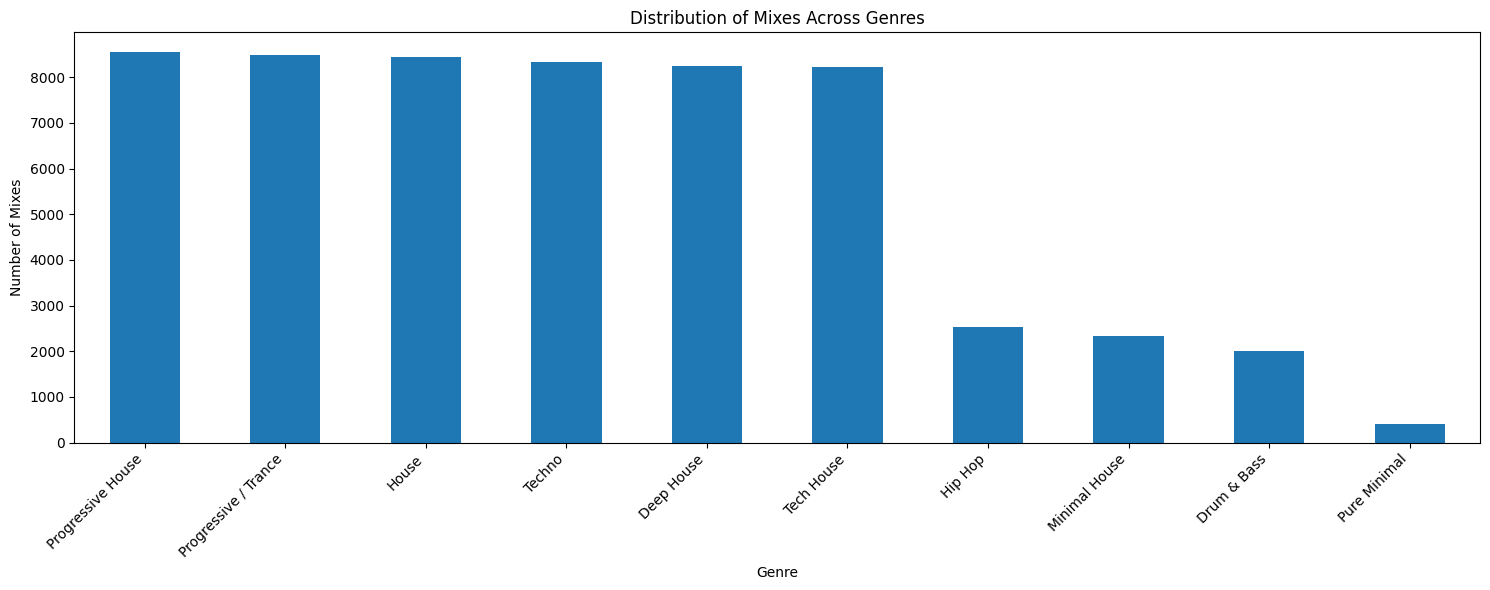

In [237]:
# Count number of mixes per genre
genre_counts = mix_stats['mix_genre'].value_counts()

print("\nNumber of mixes per genre:")
print(genre_counts)

# Create a bar plot of genre distribution
plt.figure(figsize=(15, 6))
genre_counts.plot(kind='bar')
plt.title('Distribution of Mixes Across Genres')
plt.xlabel('Genre')
plt.ylabel('Number of Mixes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [238]:
# Initialize dictionary to store filtered data
filtered_data = []
trck_thresh = 10000

# Group data by genre
genre_groups = df_clean_filt8.groupby('mix_genre')

# For each genre
for genre, genre_data in genre_groups:
    track_count = 0
    mix_ids_included = set()
    
    # Sort mixes by date to get chronological order
    genre_data_sorted = genre_data.sort_values('mix_date')
    
    # Keep adding mixes until we hit 1000 tracks
    for mix_id in genre_data_sorted['mix_id'].unique():
        # Get all tracks from this mix
        mix_tracks = genre_data_sorted[genre_data_sorted['mix_id'] == mix_id]
        
        # Add all tracks from this mix
        filtered_data.append(mix_tracks)
        mix_ids_included.add(mix_id)
        track_count += len(mix_tracks)
        
        # Check if we've hit 1000 tracks
        if track_count >= trck_thresh:
            break

# Combine all filtered data
df_filtered = pd.concat(filtered_data, ignore_index=True)

print("\nSummary of filtered dataset:")
print(f"Total number of tracks: {len(df_filtered)}")
print("\nTracks per genre:")
print(df_filtered.groupby('mix_genre').size())

# Save filtered dataset
df_filtered.to_csv("../MixDB_scrapper/output/data/scrapped_combo_filtered_pl_lt_8_10k.csv", index=False)

len(df_filtered)



Summary of filtered dataset:
Total number of tracks: 96945

Tracks per genre:
mix_genre
Deep House              10013
Drum & Bass             10007
Hip Hop                 10006
House                   10010
Minimal House           10003
Progressive / Trance    10003
Progressive House       10008
Pure Minimal             6883
Tech House              10012
Techno                  10000
dtype: int64


96945

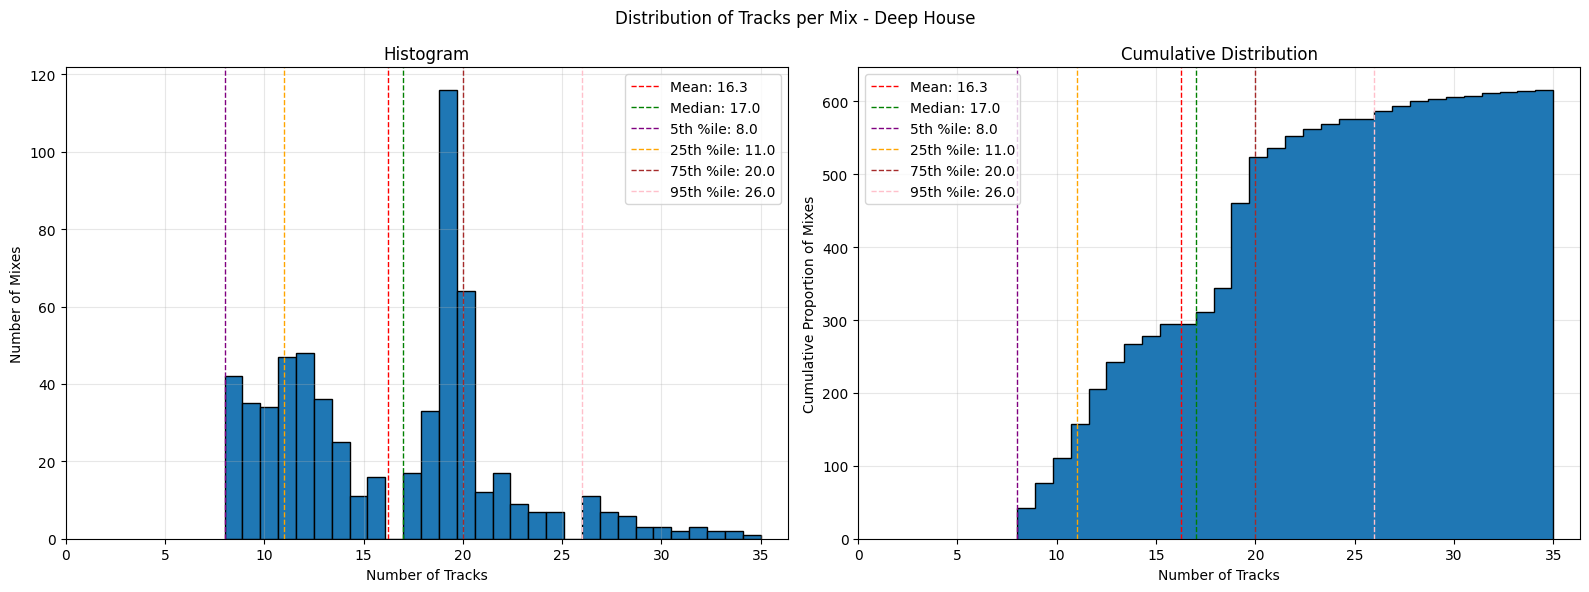

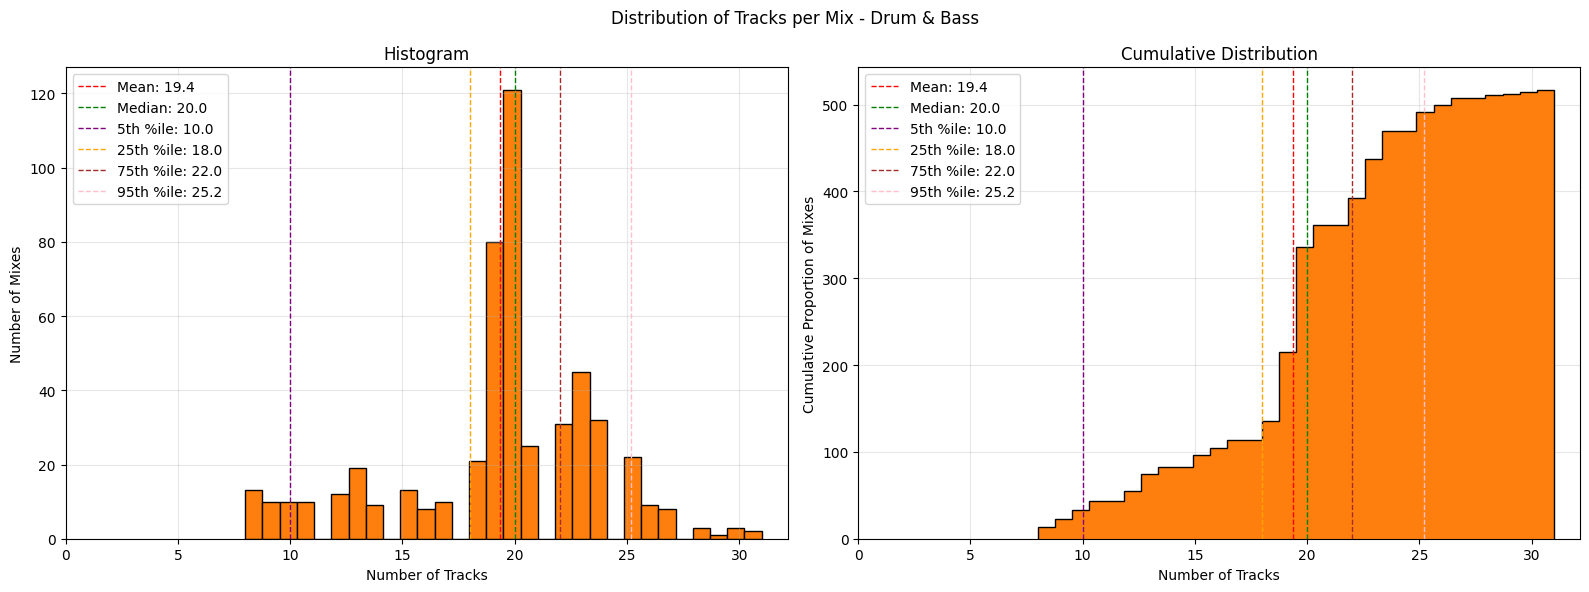

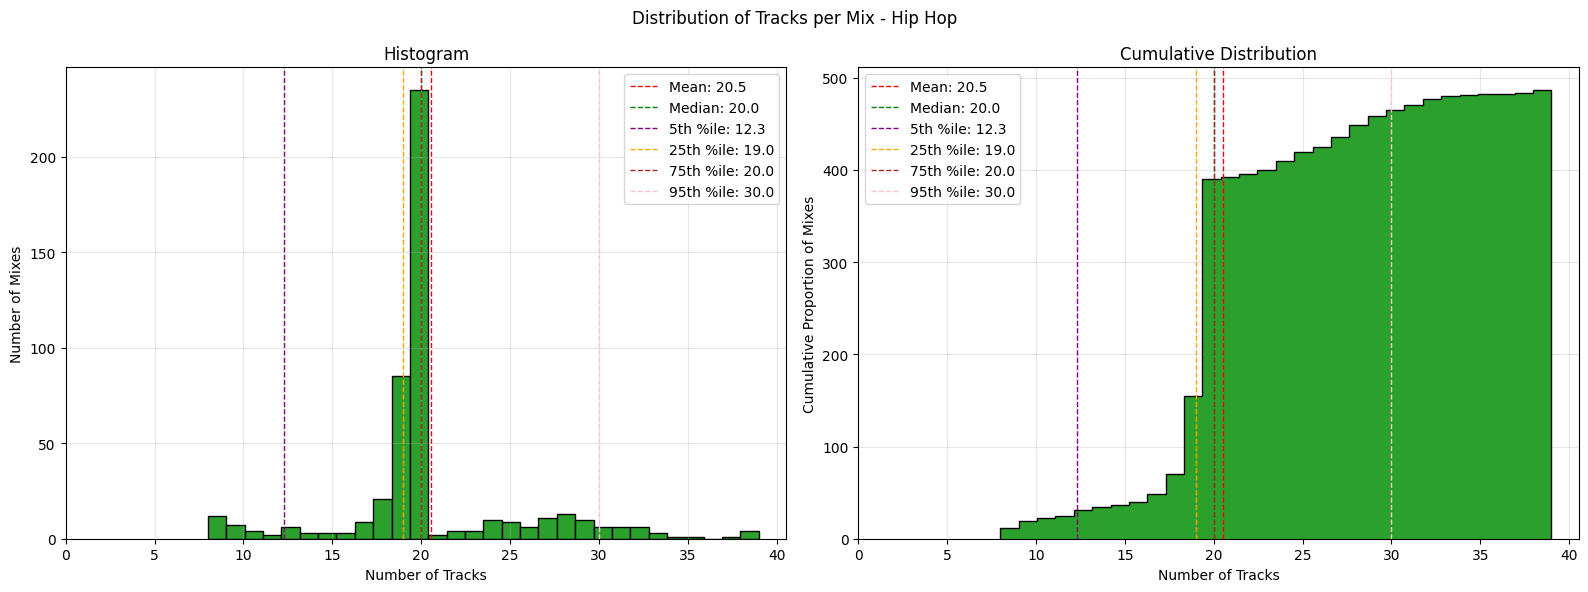

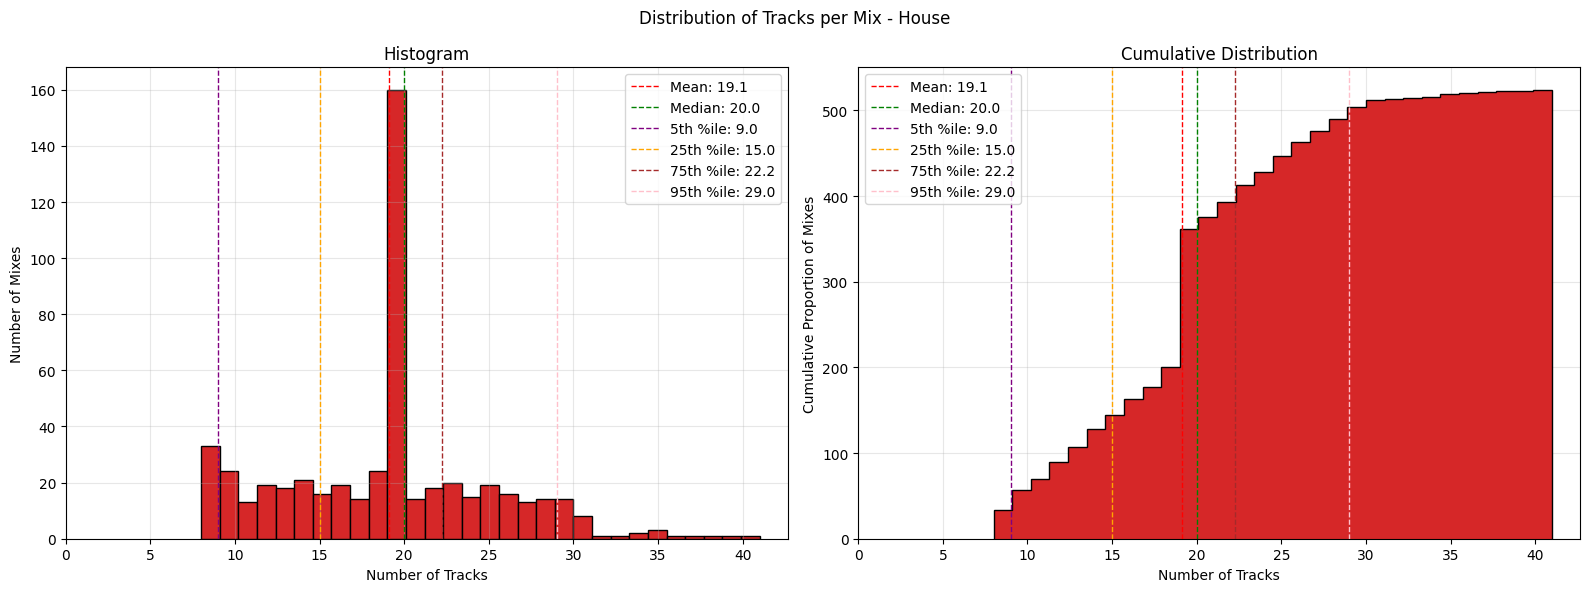

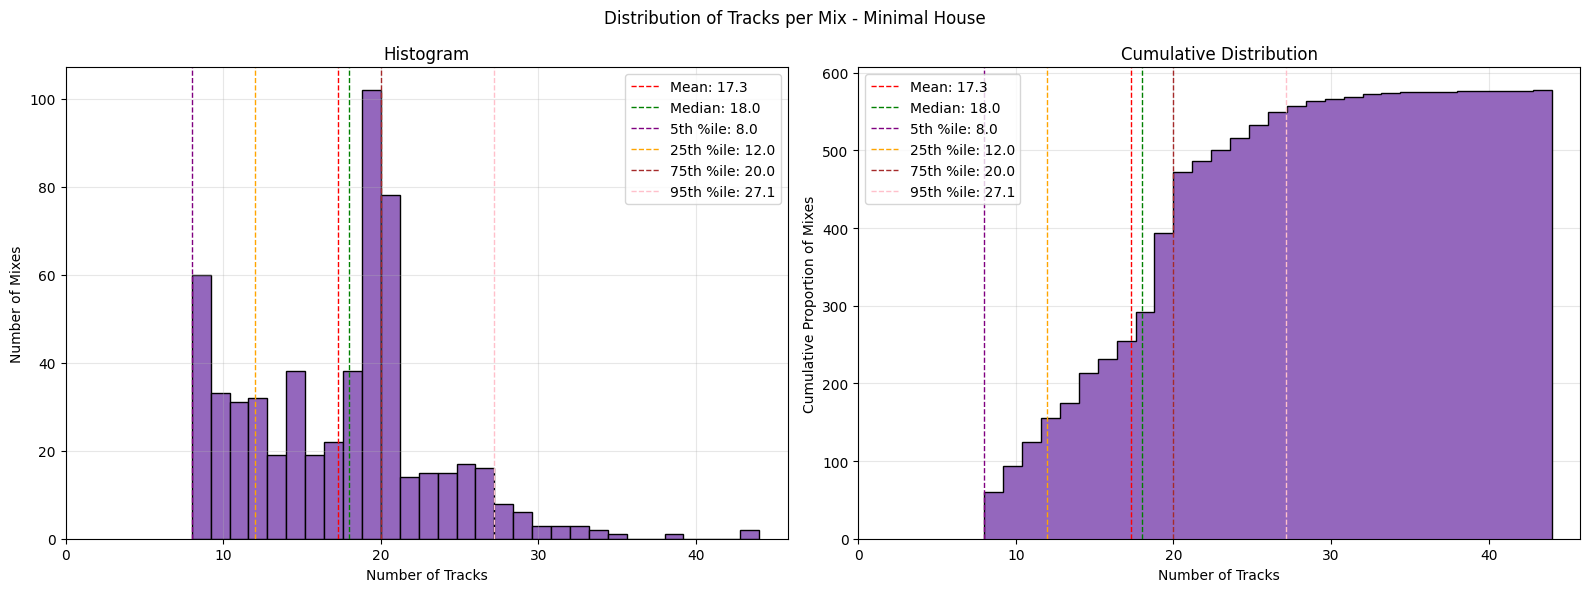

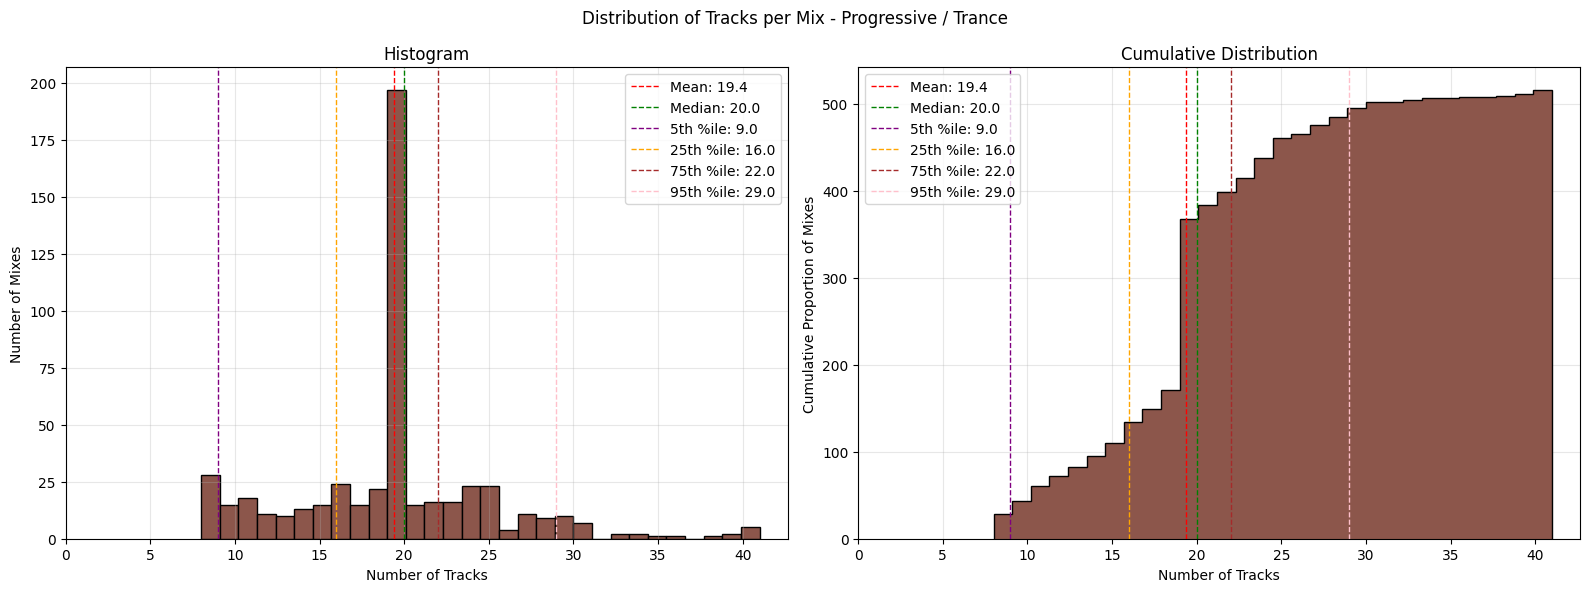

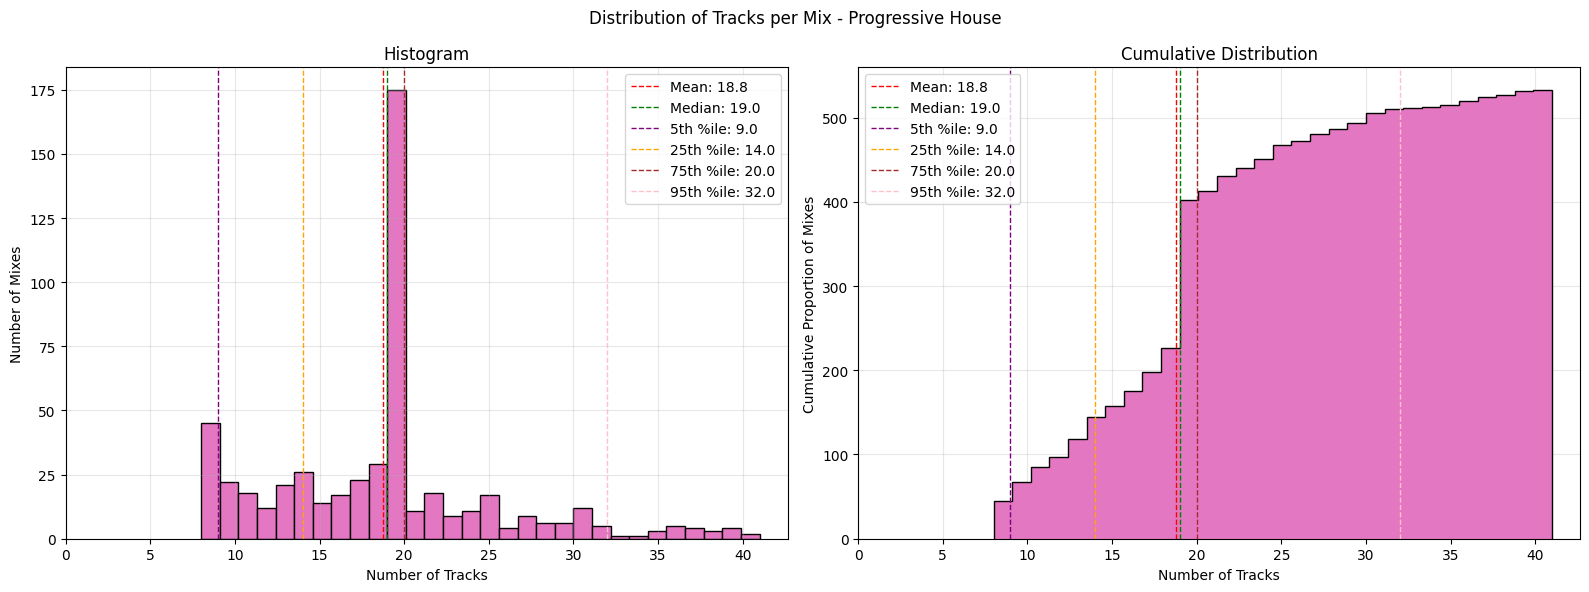

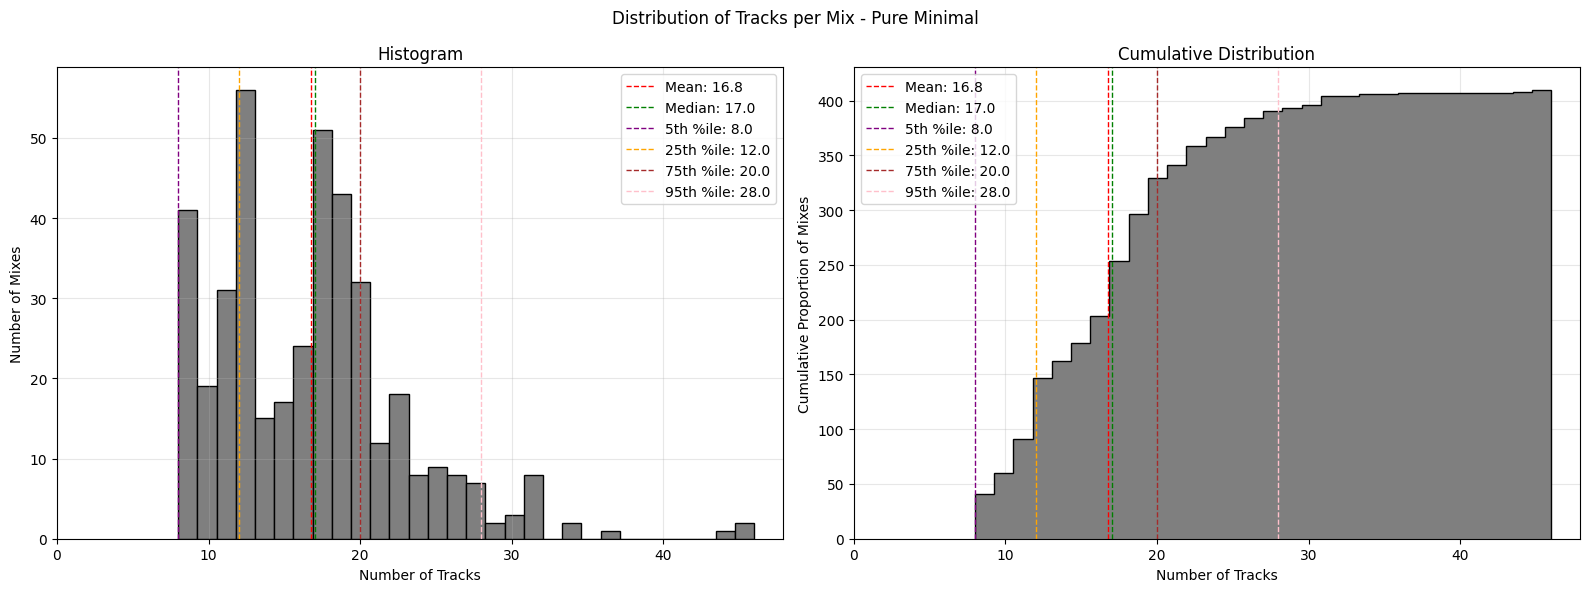

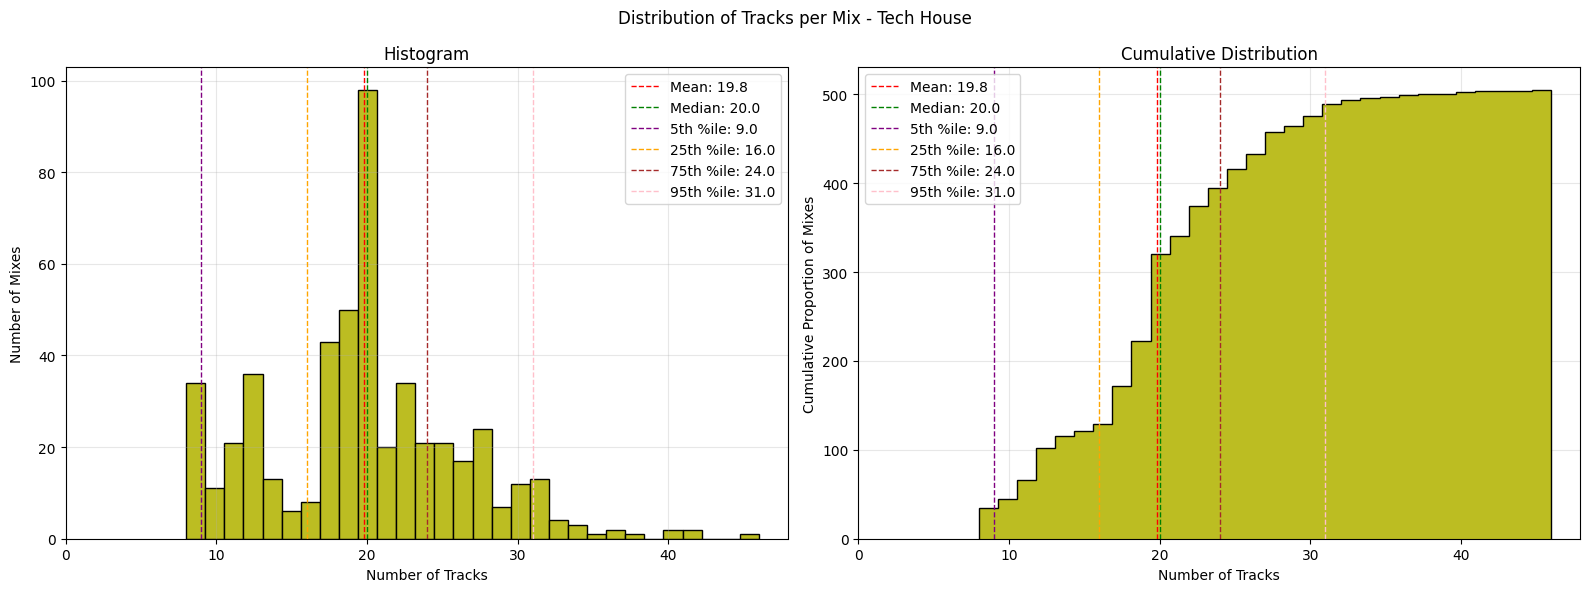

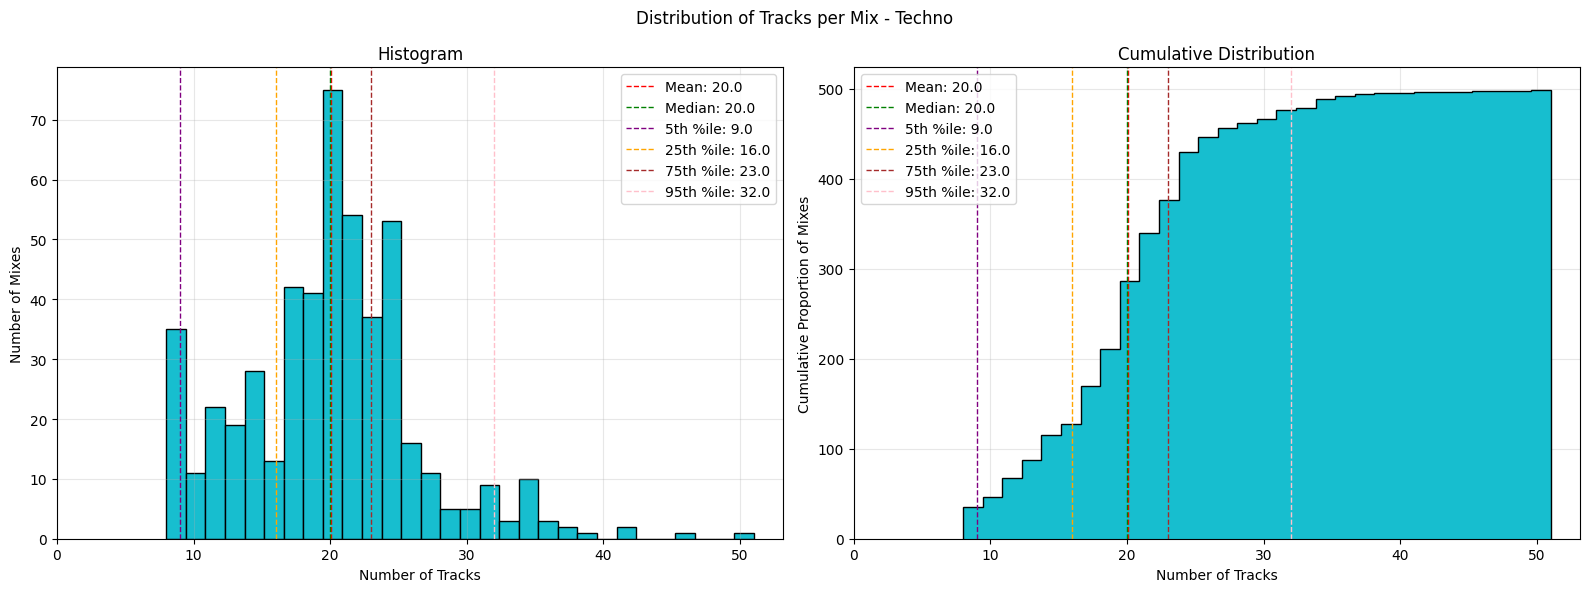

In [239]:
# Get unique genres
genres = df_filtered['mix_genre'].unique()
colors = plt.cm.tab10.colors

# Create subplots for each genre
for i, genre in enumerate(genres):
    # Filter data for this genre
    genre_data = df_filtered[df_filtered['mix_genre'] == genre].groupby('mix_id').size()
    
    if len(genre_data) > 0:  # Only plot if we have data for this genre
        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(f'Distribution of Tracks per Mix - {genre}')
        
        # Calculate percentiles
        p5 = genre_data.quantile(0.05)
        p25 = genre_data.quantile(0.25)
        p75 = genre_data.quantile(0.75)
        p95 = genre_data.quantile(0.95)
        
        # Normal histogram
        ax1.hist(genre_data, bins=30, edgecolor='black', color=colors[i])
        ax1.set_title('Histogram')
        ax1.set_xlabel('Number of Tracks')
        ax1.set_xlim(left=0)
        ax1.set_ylabel('Number of Mixes')
        ax1.grid(True, alpha=0.3)
        
        # Add mean, median and percentile lines
        ax1.axvline(genre_data.mean(), color='red', linestyle='dashed', linewidth=1,
                   label=f'Mean: {genre_data.mean():.1f}')
        ax1.axvline(genre_data.median(), color='green', linestyle='dashed', linewidth=1,
                    label=f'Median: {genre_data.median():.1f}')
        ax1.axvline(p5, color='purple', linestyle='dashed', linewidth=1,
                    label=f'5th %ile: {p5:.1f}')
        ax1.axvline(p25, color='orange', linestyle='dashed', linewidth=1,
                    label=f'25th %ile: {p25:.1f}')
        ax1.axvline(p75, color='brown', linestyle='dashed', linewidth=1,
                    label=f'75th %ile: {p75:.1f}')
        ax1.axvline(p95, color='pink', linestyle='dashed', linewidth=1,
                    label=f'95th %ile: {p95:.1f}')
        ax1.legend()
        
        # Cumulative histogram
        ax2.hist(genre_data, bins=30, cumulative=True,
                histtype='step', edgecolor='black', fill=True, color=colors[i])
        ax2.set_title('Cumulative Distribution')
        ax2.set_xlabel('Number of Tracks')
        ax2.set_ylabel('Cumulative Proportion of Mixes')
        ax2.set_xlim(left=0)
        ax2.grid(True, alpha=0.3)
        
        # Add mean, median and percentile lines
        ax2.axvline(genre_data.mean(), color='red', linestyle='dashed', linewidth=1,
                    label=f'Mean: {genre_data.mean():.1f}')
        ax2.axvline(genre_data.median(), color='green', linestyle='dashed', linewidth=1,
                    label=f'Median: {genre_data.median():.1f}')
        ax2.axvline(p5, color='purple', linestyle='dashed', linewidth=1,
                    label=f'5th %ile: {p5:.1f}')
        ax2.axvline(p25, color='orange', linestyle='dashed', linewidth=1,
                    label=f'25th %ile: {p25:.1f}')
        ax2.axvline(p75, color='brown', linestyle='dashed', linewidth=1,
                    label=f'75th %ile: {p75:.1f}')
        ax2.axvline(p95, color='pink', linestyle='dashed', linewidth=1,
                    label=f'95th %ile: {p95:.1f}')
        ax2.legend()
        
        plt.tight_layout()